In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
from PIL import Image
from io import BytesIO

def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)

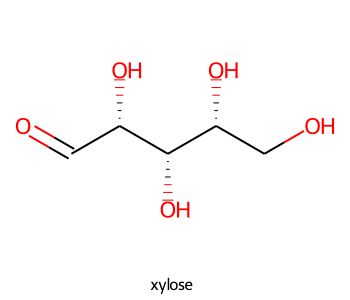

In [4]:
imgs = []
d2d = Draw.MolDraw2DCairo(350,300)
xylose = Chem.MolFromSmiles('O=C[C@H](O)[C@@H](O)[C@H](O)CO')
show_mol(d2d, xylose, legend='xylose')

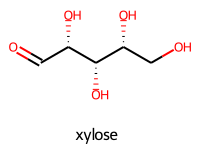

In [8]:
# bio_mols = [Chem.MolFromSmiles(elt) for elt in bio_bs]
bio_mols = [xylose]

img = Draw.MolsToGridImage(bio_mols, molsPerRow=1, subImgSize=(200, 150), legends=['xylose'])
img

In [ ]:
'''
From opig on molecular standardization
'''

from IPython.display import SVG # to use Scalar Vector Graphics (SVG) not bitmaps, for cleaner lines

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw # to draw molecules
from rdkit.Chem.Draw import IPythonConsole # to draw inline in iPython
from rdkit.Chem import rdDepictor  # to generate 2D depictions of molecules
from rdkit.Chem.Draw import rdMolDraw2D # to draw 2D molecules using vectors
from rdkit.Chem.MolStandardize import rdMolStandardize

def draw_mol_with_SVG(mol, molSize=(450,150)):
    """Use SVG to draw an RDKit molecule, mol."""
    mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():        
        rdDepictor.Compute2DCoords(mc) # Compute 2D coordinates
    # Initialize the drawer with the size
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc) # Draw the molcule
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText() # Get the SVG string
    display(SVG(svg.replace('svg:',''))) # Fix the SVG string and display